<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Import-Data-+-Explore" data-toc-modified-id="Import-Data-+-Explore-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data + Explore</a></span></li><li><span><a href="#Questions" data-toc-modified-id="Questions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Questions</a></span><ul class="toc-item"><li><span><a href="#Question-1:-What-is-the-total-number-of-confirmed-cases-per-state-from-March-to-June-2020?" data-toc-modified-id="Question-1:-What-is-the-total-number-of-confirmed-cases-per-state-from-March-to-June-2020?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Question 1: What is the total number of confirmed cases per state from March to June 2020?</a></span></li><li><span><a href="#Question-2:-What-do-you-think-about-fairness-of-vaccine-distribution-across-the-US?" data-toc-modified-id="Question-2:-What-do-you-think-about-fairness-of-vaccine-distribution-across-the-US?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Question 2: What do you think about fairness of vaccine distribution across the US?</a></span></li></ul></li></ul></div>

# Import Packages

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data + Explore

In [6]:
# Import data into dataframe - skip first two rows as they are not data
df_vaccs = pd.read_csv('covid19_vaccinations_in_the_united_states.csv', skiprows=2)

In [10]:
# Preview first 5 rows
df_vaccs.head()

,State/Territory/Federal Entity,Total Distributed,Total Administered,Distributed per 100K,Administered per 100K
0,Alaska,132350,35027,18092.0,4788.0
1,Alabama,326850,76528,6666.0,1561.0
2,Arkansas,250200,40879,8291.0,1355.0
3,American Samoa,10650,2054,19124.0,3688.0
4,Arizona,563025,137860,7735.0,1894.0


In [14]:
# Data info
df_vaccs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
State/Territory/Federal Entity    63 non-null object
Total Distributed                 63 non-null int64
Total Administered                63 non-null int64
Distributed per 100K              59 non-null float64
Administered per 100K             59 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.6+ KB


It looks like Distributed and Administered have 4 null values. Let's take a look at those.

In [15]:
# Preview rows with null values
df_vaccs[df_vaccs.isna().any(axis=1)]

,State/Territory/Federal Entity,Total Distributed,Total Administered,Distributed per 100K,Administered per 100K
5,Bureau of Prisons,16050,13891,NaN,NaN
10,Dept of Defense,353500,136557,NaN,NaN
19,Indian Health Svc,223450,65154,NaN,NaN
56,Veterans Health,804525,224109,NaN,NaN


We can see that none of these are states, however since one question asks about fairness of distribution. It looks like since we don't know the total population of these Territories and Federal Entities, it would be challenging to ascertain if these were fairly distributed as we wouldn't be able to calculate amount distributed and administered per 100K. So we're going to go ahead and drop these.

In [22]:
# Drop the NaN values
df_vaccs = df_vaccs.dropna()

In [18]:
# Let's take a look at the summary statistics
df_vaccs.describe().round()

,Total Distributed,Total Administered,Distributed per 100K,Administered per 100K
count,63.0,63.0,59.0,59.0
mean,404456.0,142656.0,8790.0,2836.0
std,498354.0,173067.0,5137.0,1169.0
min,6000.0,305.0,6059.0,294.0
25%,89188.0,38288.0,7016.0,2218.0
50%,246950.0,79057.0,7430.0,2613.0
75%,500512.0,185786.0,7834.0,3649.0
max,2833400.0,852015.0,33506.0,6113.0


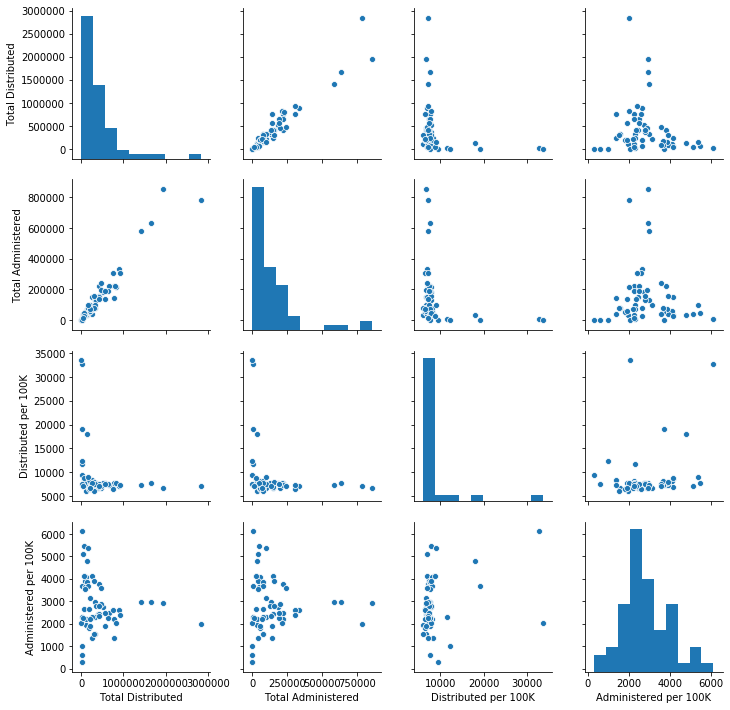

In [20]:
# Look at distributions and correlations
sns.pairplot(df_vaccs);

Total Distributed, Total Administered and Distributed per 100K all appear to be right skewed, with Administered per 100K appearing to be normally distributed. We can see there appears to be a positive linear relationship between Total Distributed and Total Administered, which makes sense. Distributed vaccines are being administered.

This data set seems pretty straight forward. Let's take a look at our next set of data now. 

In [8]:
df_cases = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

In [11]:
df_cases.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,05/04/2020,KY,5245,5245.0,0.0,115,0.0,261,261.0,0.0,8,0.0,05/05/2020 05:25:08 PM,Agree,Agree
1,04/21/2020,MI,32967,32967.0,0.0,967,0.0,2700,2700.0,0.0,232,0.0,04/21/2020 04:22:39 PM,Agree,Agree
2,01/01/2021,FL,1300528,NaN,NaN,0,6063.0,21673,NaN,NaN,0,7.0,01/02/2021 02:50:51 PM,Not agree,Not agree
3,04/30/2020,IA,7145,NaN,NaN,302,0.0,162,NaN,NaN,14,0.0,05/01/2020 09:00:19 PM,Not agree,Not agree
4,06/25/2020,NE,18346,NaN,NaN,125,0.0,260,NaN,NaN,3,0.0,06/26/2020 07:18:27 PM,Not agree,Not agree


In [21]:
# Data info
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 15 columns):
submission_date    21420 non-null object
state              21420 non-null object
tot_cases          21420 non-null int64
conf_cases         9009 non-null float64
prob_cases         9009 non-null float64
new_case           21420 non-null int64
pnew_case          16300 non-null float64
tot_death          21420 non-null int64
conf_death         9479 non-null float64
prob_death         9479 non-null float64
new_death          21420 non-null int64
pnew_death         16202 non-null float64
created_at         21420 non-null object
consent_cases      17493 non-null object
consent_deaths     18207 non-null object
dtypes: float64(6), int64(4), object(5)
memory usage: 2.5+ MB


We can see this data set is much larger. And there appear to be many null values in confirmed and probable cases as well as deaths. 

For sake of time, I am going to drop the null values.

In [24]:
# Preview rows with null values
df_cases[df_cases.isna().any(axis=1)]

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
2,01/01/2021,FL,1300528,NaN,NaN,0,6063.0,21673,NaN,NaN,0,7.0,01/02/2021 02:50:51 PM,Not agree,Not agree
3,04/30/2020,IA,7145,NaN,NaN,302,0.0,162,NaN,NaN,14,0.0,05/01/2020 09:00:19 PM,Not agree,Not agree
4,06/25/2020,NE,18346,NaN,NaN,125,0.0,260,NaN,NaN,3,0.0,06/26/2020 07:18:27 PM,Not agree,Not agree
5,02/24/2020,CA,10,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
11,01/29/2020,MA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21414,02/25/2020,HI,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
21416,03/23/2020,RI,106,NaN,NaN,9,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,NaN
21417,10/09/2020,GU,2989,NaN,NaN,0,0.0,58,NaN,NaN,0,0.0,10/10/2020 01:30:17 PM,Not agree,Not agree
21418,07/12/2020,DC,10847,NaN,NaN,46,0.0,568,NaN,NaN,0,0.0,07/13/2020 03:19:34 PM,NaN,NaN


There are a lot of null values here. I would definitely revisit this and impute where relevant.

In [25]:
# Drop the NaN values
df_cases = df_cases.dropna()

In [26]:
# Check out the summary statistics
df_cases.describe().round()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,7877.0,7877.0,7877.0,7877.0,7877.0,7877.0,7877.0,7877.0,7877.0,7877.0
mean,112756.0,105132.0,7624.0,1262.0,134.0,3151.0,2838.0,313.0,21.0,2.0
std,147544.0,138148.0,14452.0,2071.0,649.0,4834.0,4104.0,875.0,67.0,103.0
min,0.0,0.0,0.0,-33355.0,-33864.0,0.0,0.0,0.0,-397.0,-5482.0
25%,9638.0,8858.0,0.0,108.0,0.0,229.0,215.0,0.0,0.0,0.0
50%,53901.0,51050.0,1720.0,550.0,8.0,1158.0,1102.0,26.0,7.0,0.0
75%,162362.0,150531.0,8015.0,1479.0,105.0,4335.0,3716.0,246.0,22.0,1.0
max,1040168.0,1040168.0,124998.0,25721.0,18156.0,25742.0,20901.0,5482.0,4585.0,5482.0


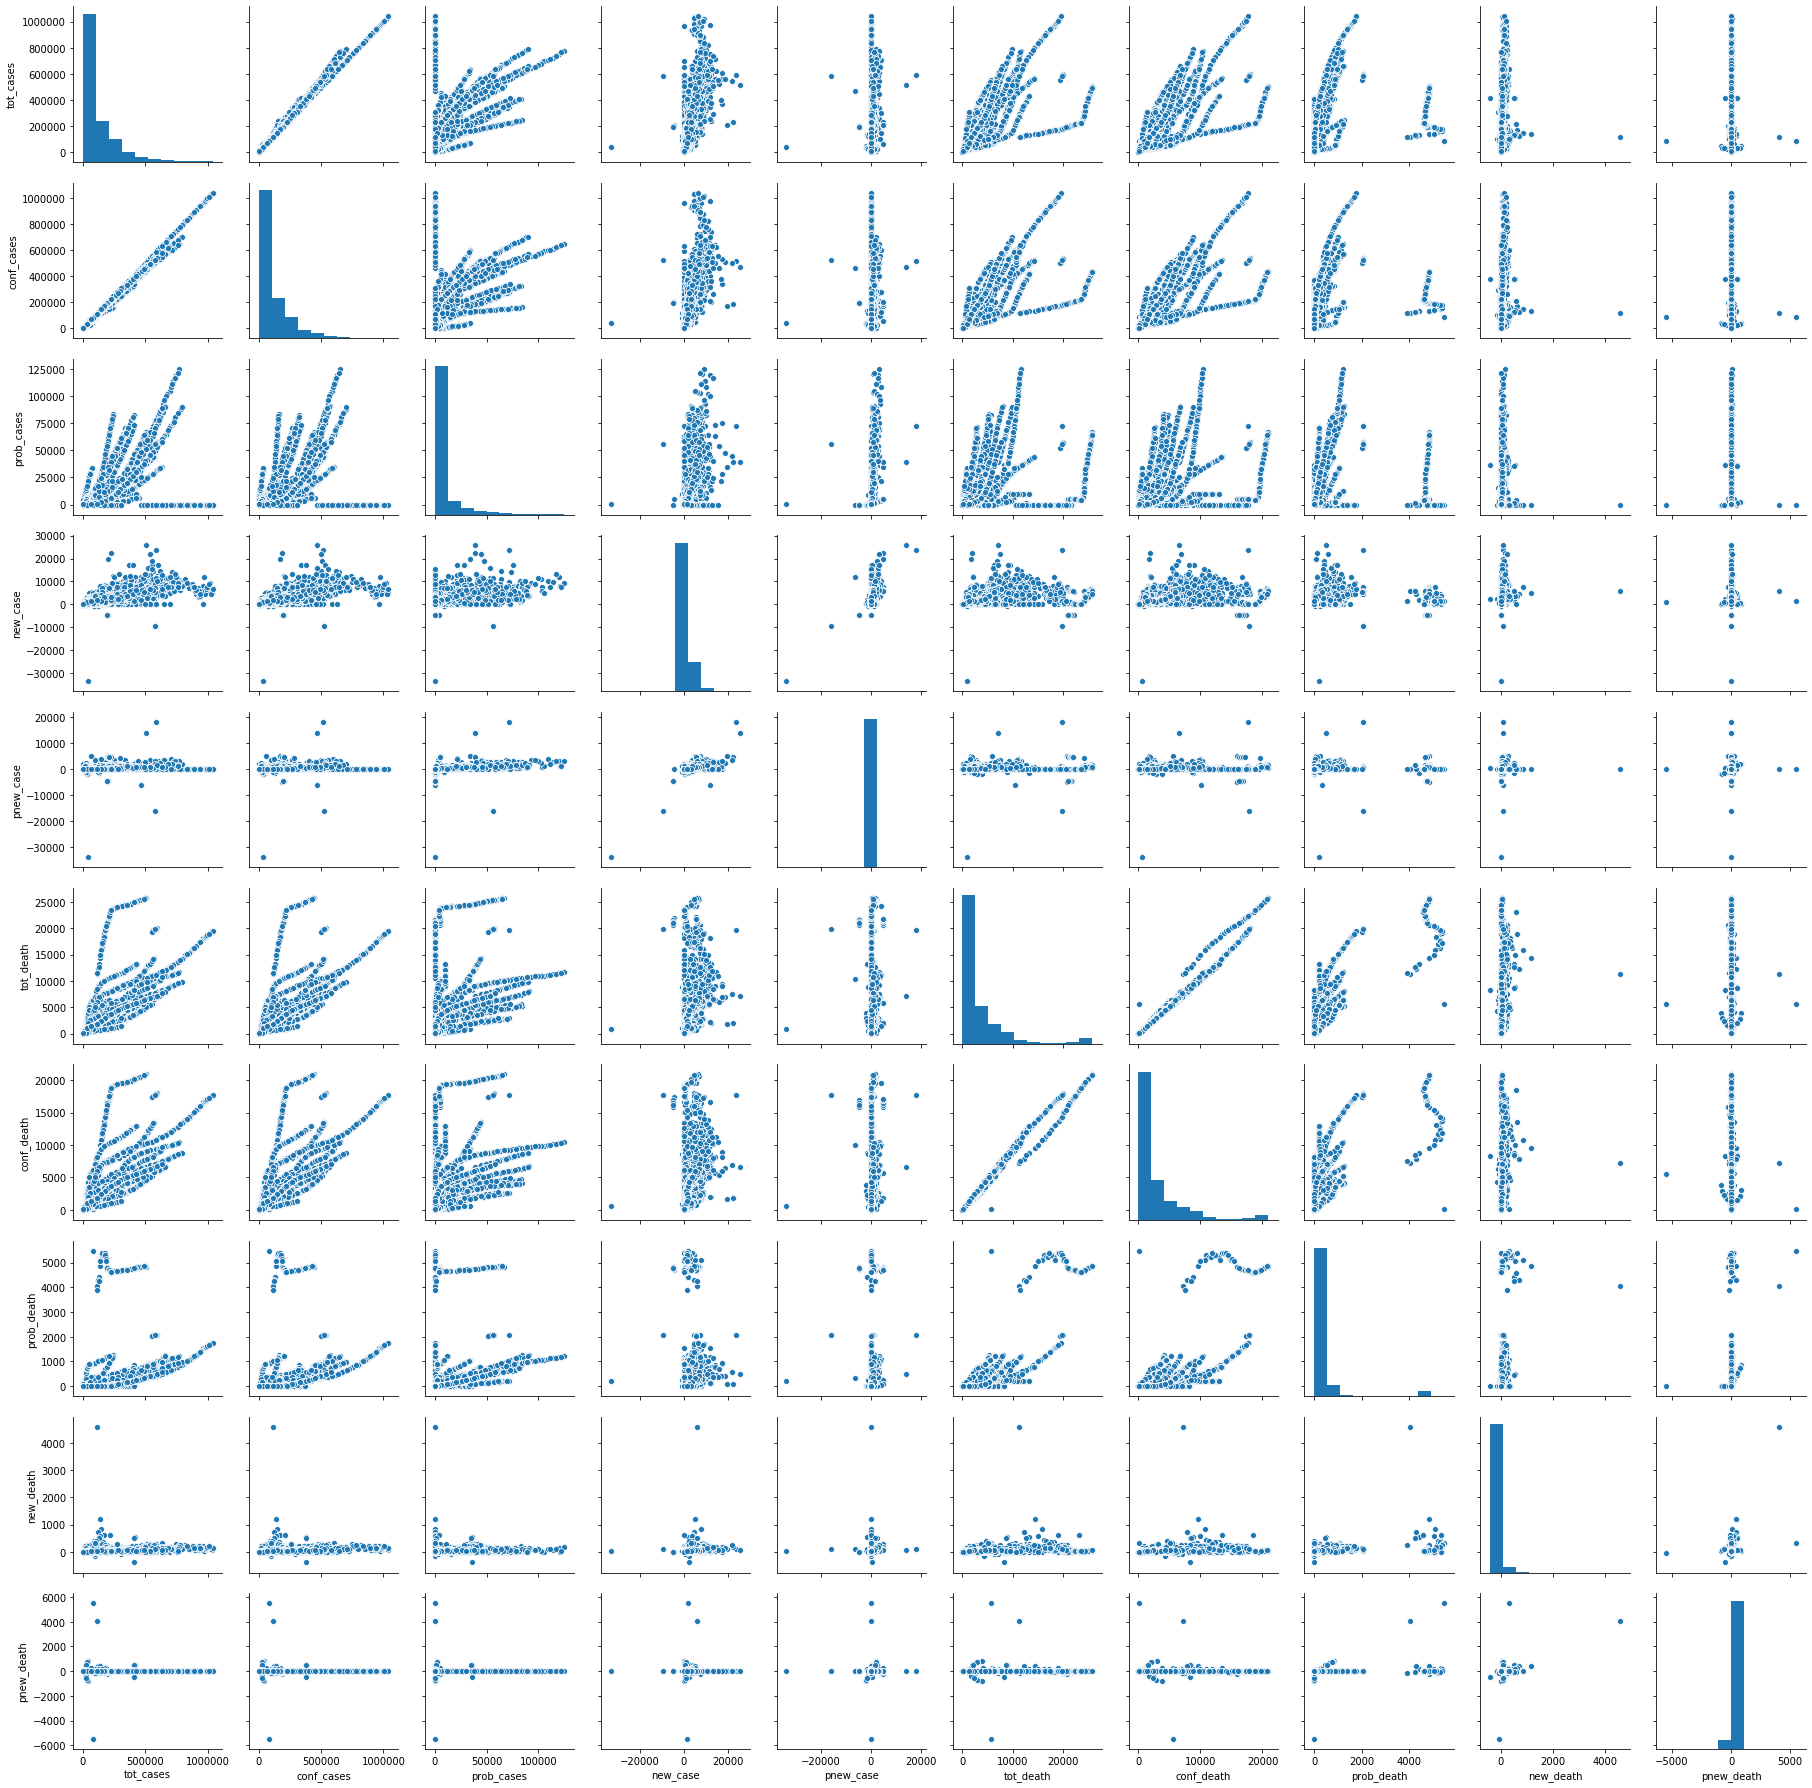

In [27]:
# Look at distributions and correlations
sns.pairplot(df_cases);

# Questions

## Question 1: What is the total number of confirmed cases per state from March to June 2020?

In [47]:
# Create new dataframe with relevant data
conf_cases = df_cases[['submission_date','state','conf_cases']]

In [48]:
# Preview new dataframe
conf_cases

,submission_date,state,conf_cases
0,05/04/2020,KY,5245.0
1,04/21/2020,MI,32967.0
6,11/14/2020,VA,183455.0
7,11/17/2020,DE,28473.0
8,08/17/2020,IL,207854.0
...,...,...,...
21398,11/03/2020,NC,268613.0
21404,06/07/2020,NC,35546.0
21405,12/10/2020,UT,225946.0
21408,05/19/2020,OR,3636.0


In [49]:
# Convert date column to datetime
conf_cases['submission_date'] = pd.to_datetime(conf_cases['submission_date']);

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
conf_cases

,submission_date,state,conf_cases
0,2020-05-04,KY,5245.0
1,2020-04-21,MI,32967.0
6,2020-11-14,VA,183455.0
7,2020-11-17,DE,28473.0
8,2020-08-17,IL,207854.0
...,...,...,...
21398,2020-11-03,NC,268613.0
21404,2020-06-07,NC,35546.0
21405,2020-12-10,UT,225946.0
21408,2020-05-19,OR,3636.0


In [51]:
# Index datetime column from March 1st to June 30th 2020
mask = (conf_cases['submission_date'] > '03-01-2020') & (conf_cases['submission_date'] <= '06-30-2020')
conf_cases_mar_june = conf_cases.loc[mask]

In [54]:
conf_cases_mar_june_state = conf_cases_mar_june.groupby(['state']).sum()
conf_cases_mar_june_state

,conf_cases
state,
AL,1237143.0
AZ,1774319.0
CO,1546922.0
CT,2652835.0
DE,545150.0
FSM,0.0
GA,3126968.0
ID,200585.0
IL,7299516.0


In [58]:
# Drop non-states
drop = ['FSM','RMI']
conf_cases_mar_june_state = conf_cases_mar_june_state.drop(drop, axis=0)

In [59]:
conf_cases_mar_june_state

,conf_cases
state,
AL,1237143.0
AZ,1774319.0
CO,1546922.0
CT,2652835.0
DE,545150.0
GA,3126968.0
ID,200585.0
IL,7299516.0
KY,645798.0


In [68]:
# Sort in ascending order
conf_cases_mar_june_state = conf_cases_mar_june_state.sort_values(by=['conf_cases'])

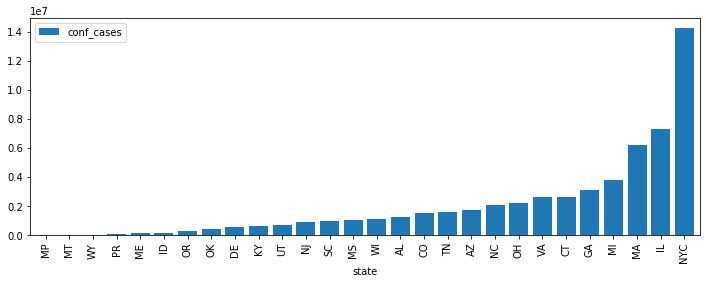

In [69]:
# Plot for visualization
conf_cases_mar_june_state.plot.bar(figsize=(12,4), width=0.8)
plt.show()

## Question 2: What do you think about fairness of vaccine distribution across the US?

In [70]:
df_vaccs

,State/Territory/Federal Entity,Total Distributed,Total Administered,Distributed per 100K,Administered per 100K
0,Alaska,132350,35027,18092.0,4788.0
1,Alabama,326850,76528,6666.0,1561.0
2,Arkansas,250200,40879,8291.0,1355.0
3,American Samoa,10650,2054,19124.0,3688.0
4,Arizona,563025,137860,7735.0,1894.0
6,California,2833400,782638,7171.0,1981.0
7,Colorado,416875,218185,7239.0,3789.0
8,Connecticut,246875,147174,6924.0,4128.0
9,District of Columbia,60775,29228,8611.0,4141.0
11,Delaware,70650,25708,7255.0,2640.0


In [71]:
df_vaccs.sort_values(by=['Distributed per 100K'])

,State/Territory/Federal Entity,Total Distributed,Total Administered,Distributed per 100K,Administered per 100K
50,South Carolina,311950,79057,6059.0,1535.0
18,Idaho,108825,34713,6090.0,1942.0
43,Ohio,751250,303522,6427.0,2597.0
33,Mississippi,192750,53347,6476.0,1792.0
22,Kansas,192200,77217,6597.0,2650.0
54,Utah,211575,70957,6599.0,2213.0
17,Iowa,208875,98691,6620.0,3128.0
25,Massachusetts,458600,197823,6654.0,2870.0
41,Nevada,205200,58651,6662.0,1904.0
1,Alabama,326850,76528,6666.0,1561.0


It's interesting to see that the amount of vaccines distributed to US territories and Alaska is higher. Let's look at a distribution.

In [72]:
distribution = df_vaccs[['State/Territory/Federal Entity','Distributed per 100K']].sort_values(by=['Distributed per 100K'])

In [74]:
distribution.describe()

,Distributed per 100K
count,59.000000
mean,8789.525424
std,5137.396259
min,6059.000000
25%,7015.500000
50%,7430.000000
75%,7834.000000
max,33506.000000


In [75]:
distribution.median()

Distributed per 100K    7430.0
dtype: float64

In [78]:
distribution

,State/Territory/Federal Entity,Distributed per 100K
50,South Carolina,6059.0
18,Idaho,6090.0
43,Ohio,6427.0
33,Mississippi,6476.0
22,Kansas,6597.0
54,Utah,6599.0
17,Iowa,6620.0
25,Massachusetts,6654.0
41,Nevada,6662.0
1,Alabama,6666.0


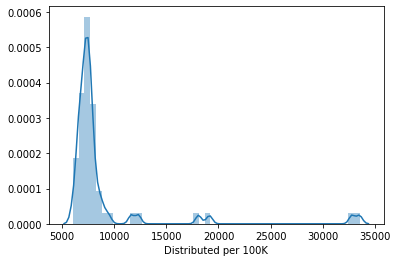

In [82]:
sns.distplot(distribution['Distributed per 100K']);

Let's remove the outliers and look at the distribution again.

In [84]:
# Drop outliers
outliers = ['Federated States of Micronesia',
            'Guam','Marshall Islands','Alaska',
            'American Samoa','Northern Mariana Islands',
            'Republic of Palau']

distribution.drop(outliers, axis=1)

KeyError: "['Federated States of Micronesia' 'Guam' 'Marshall Islands' 'Alaska'\n 'American Samoa' 'Northern Mariana Islands' 'Republic of Palau'] not found in axis"